# AML Homework 3
# Adam Finch

## Question 1: Model Complexity and Generalization (30 points)

In [1]:
# Small script to run for Q1: 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

### Write a function that fits a polynomial LinearRegression Model for degrees 1, 3, 6, and 9

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

def fit_poly():
    degrees = [1,3,6,9]  
    output_array = np.zeros((4,100))
    
    for i, j in enumerate(degrees):
        poly = PolynomialFeatures(degree=j)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        ols = LinearRegression()
        ols.fit(X_poly, y_train)
        y_pred = ols.predict(poly.fit_transform(np.linspace(0, 10, 100).reshape(100,1)))
        output_array[i,:] = y_pred
    return output_array


In [3]:
output = fit_poly()
print(output.shape)

(4, 100)


### Make a plot for the fitted lines on top of the original data.

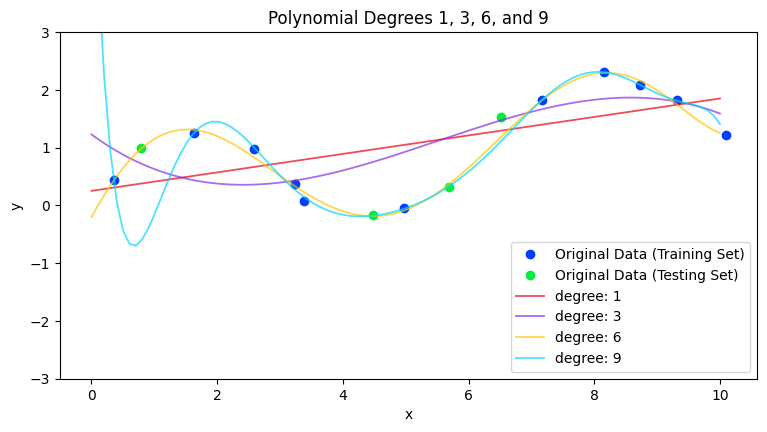

In [4]:
def plot_poly(y_preds):
    plt.style.use('seaborn-v0_8-bright')
    plt.figure(figsize=(9,4.5))
    plt.plot(X_train, y_train, 'o', label='Original Data (Training Set)', markersize=6, alpha=1)
    plt.plot(X_test, y_test, 'o', label='Original Data (Testing Set)', markersize=6, alpha=1)
    
    degrees = [1, 3, 6, 9]
    for i, j in enumerate(degrees):
        plt.plot(np.linspace(0, 10, 100), y_preds[i], alpha=0.7, lw=1.3, label='degree: {}'.format(j))
    
    plt.ylim(-3, 3)
    plt.legend(loc=4)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title('Polynomial Degrees 1, 3, 6, and 9')
    plt.show()

plot_poly(output)

From this graph, it is apparent that degrees 1 and 3 are underfitting, and degree 9 is overfitting to the training data. Using polynomial features with degree 6 seems to be the best fit in this case. 

### Write a function that fits a polynomial LinearRegression model on the training data X train for degrees 0 through 9. For each model compute R-squared regression score on the training data as well as the the test data.

In [5]:
def poly_rsquared():
    degrees = [i for i in range(10)]  
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    for i, j in enumerate(degrees):
        poly = PolynomialFeatures(degree=j)
        Xtr_poly = poly.fit_transform(X_train.reshape(11,1))
        ols = LinearRegression()
        ols.fit(Xtr_poly, y_train)
        r2_train[i] = r2(ols.predict(Xtr_poly), y_train)
        
        Xtest_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = r2(ols.predict(Xtest_poly), y_test)
    return (r2_train, r2_test)


    

### This function should return one tuple of numpy arrays (r2 train, r2 test). Both arrays should have shape (10, ):

In [6]:
results = poly_rsquared()

print("r2_train shape: ", results[0].shape)
print("r2_test shape: ", results[1].shape)

r2_train shape:  (10,)
r2_test shape:  (10,)


### Based on the scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with a good generalization performance on this dataset? Explain your answer.

In [7]:
from prettytable import PrettyTable

resultsTable = PrettyTable(["Degree", "r2_train", "r2_test"])

for i in range(10):
    resultsTable.add_row([i, round(results[0][i], 4), round(results[1][i], 4)])
    
print(resultsTable)

+--------+----------+---------+
| Degree | r2_train | r2_test |
+--------+----------+---------+
|   0    |   0.0    |   0.0   |
|   1    | -0.3297  | -3.9588 |
|   2    | -0.2168  | -7.6736 |
|   3    |  0.297   | -3.2547 |
|   4    |  0.9124  |  0.1933 |
|   5    |  0.9752  |  0.8224 |
|   6    |  0.9901  |  0.8861 |
|   7    |  0.9935  |  0.8963 |
|   8    |  0.9964  |  0.5509 |
|   9    |  0.998   | -0.6898 |
+--------+----------+---------+


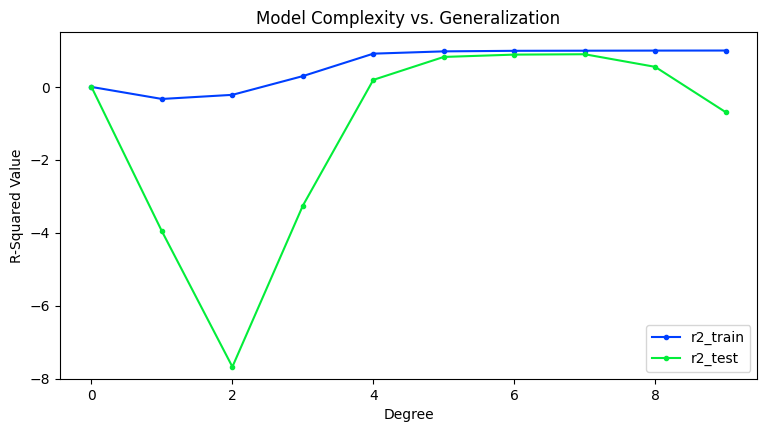

In [8]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(9,4.5))
degrees = [i for i in range(10)]
plt.plot(degrees, results[0], 'o-', label='r2_train', markersize=3, alpha=1)
plt.plot(degrees, results[1], 'o-', label='r2_test', markersize=3, alpha=1)
    
plt.legend(loc=4)
plt.ylim(-8,1.5)
plt.ylabel('R-Squared Value')
plt.xlabel('Degree')
plt.title('Model Complexity vs. Generalization')
plt.show()

Degree levels 0-3 appear to be underfitting the data, as neither the training or the testing r2 values are very good. On the flip side, degree levels 8 and 9 are overfitting the data -- the training r2 value for these degrees is very high, but it comes at the expense of a declining test r2 value when compared to previous degrees. Degree 7 is my choice for a degree value that provides a good generalization performance on this data set. Degree 7 achieved the highest testing set r2 value at 0.8963. The training r2 value for degree 7 was also very good, at 0.9935. This matches up with the figure plotted in step 1 (where degree 6 performed the best out of the 4 degrees tested). 

### Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters alpha=0.01, max iter=10000) on polynomial features of degree 12. Return the score for LinearRegression and Lasso model’s test sets. This function should return one tuple (LinearRegression R2 test score, Lasso R2 test score).

In [9]:
from sklearn.linear_model import Lasso

def poly12():
    poly = PolynomialFeatures(degree=12)
    Xtr_poly = poly.fit_transform(X_train.reshape(11,1))
    Xtest_poly = poly.fit_transform(X_test.reshape(4,1))
    
    #First fit Linear Regression: 
    linreg = LinearRegression()
    linreg.fit(Xtr_poly, y_train)
    linreg_testr2 = r2(linreg.predict(Xtest_poly), y_test)
    
    #Next fit Lasso: 
    lasso = Lasso(alpha=0.01, max_iter = 10000)
    lasso.fit(Xtr_poly, y_train)
    lasso_testr2 = r2(lasso.predict(Xtest_poly), y_test)

    return (linreg_testr2, lasso_testr2)

In [10]:
poly12()

(0.180100381330343, 0.6046307825816736)

Fitting a degree 12 polynomial to a linear regression model returned an r-squared test value of 0.1801, indicating that there is a strong chance this model is overfitting. The Lasso model returned an r-squared test value of 0.6046, which is still not as good as the r-squared test value for the degree 7 polynomial model found in the previous step; however, it is not overfitting as much as the 12-degree linear regression model. This is likely because the lasso algorithm is a penalized regression model, meaning that it employs both variable selection and regularization techniques in order to ensure that the most important variables are weighted more heavily than less important variables, and some variables are eliminated completely (given a coefficient of 0). 

# Question 2: Naive Bayes vs Logistic Regression (38 points)

### Provide high-level descriptions of the Naive Bayes and Logistic Regression algorithms. Be sure to describe how to estimate the model parameters and how to classify a new example. What are the differences you can think of for these two models?

#### 1. Naive Bayes: 

High-level description: Naive Bayes is a generative method for classification, meaning that it answers the question "given the label, what is the probability of this feature and what is the probability of the label?" (source: AML slides). Naive Bayes model is based on the assumption of conditional independnence between features given the class label. This assumption is why it is called "Naive" bayes, because features are rarely independent of each other in actuality; however, despite this, the algorithm has been proven to be a good classifier for many different tasks such as the data set in this problem (text classification). 

How to estimate model parameters: In the learning step of this algorithm, it is necessary to calculate the prior distribution of your target variable y: p(y). The prior distribution (p(y)) represents the probability of each class occurring in the dataset. This model parameter is typically estimated by counting the number of instances of each class and dividing by the total number of instances.You also need to calculate the class conditional distribution of xi: p(xi | y). The class conditional distribution represents the probability of observing a specific feature value (xi) given a class label (y). This model parameter is estimated by counting how often xi occurs within the instances of class y and dividing by the total number of instances in class y. 

How to classify a new example: After you have finished calculating the prior distribution, you can move on to making predictions. When classifying a new example, you can use Baye's Theorem to calculate the posterior probability that the observation belongs to each class given its input features (x1, x2, ..., xd). Essentially, what you're doing in this step is computing p(y | x) for each class in y (for example, if y is a binary variable calculate p(y | x) for y = 0 and for y = 1). You also need to "weight" these probabilities by the prior distribution p(y) calculated in the previous step. Then you are ready to classify the observation: choose the class with the largest posterior probability. 


High-level Step by Step for Algorithm: 

1. Calculate prior probabilities for each class: p(y)
    - For a random document drawn, how likely is that document to be a part of class y?
2. Calculate class conditional probabilities: p(xi | y)
    - use Laplace smoothing to ensure none of these turn out to be 0
3. For each new example (document) calculate the posterior probability (Bayes Theorem)
    - product of p(xi | y) for each word in the document multipled by the prior p(y) of the class
    - Can also use logged liklihoods and logged priors to prevent underflow (change product to a sum)
4. Predict the class with the highest posterior probability for each document. 



#### 2. Logistic Regression:

High-Level Description: Logistic Regression is a discriminative method for classification, which means it focuses on answering the question "given the features, what is the probability of each class label?". Logistic regression is used when the dependent variable is non continuous -- a dummy variable in the case of a binary classification problem. The 20 newsgroups dataset is an example of a multi class logistic regression problem.  The logistic curve in logistic regression is constructed by applying the natural logarithm to the odds ratio of the target variable.

How to Estimate Model Parameters: The goal in logistic regression is to find the set of model parameters (coefficients and intercept) that maximizes the likelihood of the observed data given the chosen function (sigmoid for binary logistic regression and softmax for multi class logistic regression). The function maps a linear combination of feature values to a probability between 0 and 1. The likelihood function is defined as the product of the conditional probabilities of the observed data points belonging to their respective classes. The log of the likelihood function is taken to change the product to a sum in order to make maximization easier. The log likelihood function is maximized (same thing as minimizing the cost function), this is known as the "maximum likelihood estimator". Gradient Descent is used to optimize this process for a multi class regression. 

How to Classify a New Example: After estimating the model parameters, you can use logistic regression to classify new examples. To classify an observation, you multiply the new feature matrix by the previously computed linear combination of the feature values and their corresponding weights. The softmax function produces a probability that the observation belongs to each of the given classes, ensuring that the probabilities sum up to 1. The sigmoid function ensures that the output is bounded between 0 and 1. You then can simply predict the class with the highest predicted probablity. 


High-level Step by Step for Algorithm: 

1. For each class, compute the linear combination made up of the feature matrix and the weight vectors (coefficients) for that class 
2. Maximize the likelihood function (same as minimizing the cost function / loss) using Gradient Descent: 
    - Calculate class probablities based on putting the linear combinations found in step 1 through the softmax function
    - Calculate the gradient of the cost function with respect to the weights
    - Update the weights by subtracting the learning rate multiplied by the calculated loss gradient. 
    - Repeat until loss function is minimized (or for a set number of iterations)
3. To classify a new observation, multiply its feature matrix by the previously computed weights, then put the result into the softmax function to find the probabilities that the document belongs to each of the given classes. 
4. Predict the class with the highest computed probability.

** Citation 1 (Bamtak) helped me to think through this step by step process, although I did not use any of his code or directly quote the article. 



#### 3. Differences between the models:

The biggest difference between Naive Bayes and Logistic Regression is that Naive Bayes is a generative model and logistic regression is discriminative. This means that Logistic Regression makes predictions on unseen data based on conditional probability, whereas Naive Bayes focuses on the distribution of a dataset given the labels to return a probability for a given example. Other differences lie in the assumptions: Naive Bayes assumes independence of features, while logistic regression does not (although it still is important to avoid multi collinearity for logistic regressions). Naive Bayes can also directly handle categorical variables, whereas with a logistic regression model you need to encode these categorical variables to numeric values. 







### Imagine that a certain word is never observed in the training data, but occurs in a test instance. What will happen when our bag-of-words Naive Bayes classifier predicts the probability of this test instance? Explain why this situation is undesirable. Will logistic regression have a similar problem? Why or why not?

In a bag-of-words Naive Bayes model, each word is treated as a feature, and the classifier calculates the probability of observing each word given the class label (conditional probabilities). If a word occurs in a test instance, but was not seen in the training data, its conditional probability will be estimated as 0. 

This situation is undesirable because to calculate the overall probability that a class generates a specific instance you need to multiply all of the conditional probabilities together. Since anything multiplied by 0 is 0, this means that the entire result will be 0, regardless of the other conditional probabilities. This is a major problem with the Naive Bayes model; to remedy this issue, smoothing techniques such as LaPlace are utilized. 

Logistic Regression Models will not run into this same problem (at least to the same extent). During the training phase, a logistic regression model will learn coefficients for each word in the training data, representing the impact of each word on the prediction. For words not seen during training, the model initizlizes these coefficients to zero. However, in logistic regression models, these coefficients are not multiplied together, so this zero coefficient will not have as severe an impact as the conditional probabilities being equal to zero in the Naive Bayes model. Instead, in a logistic regression, the feature values and their corresponding coefficients are fed into the logistic (sigmoid) function to map these to probabilities between 0 and 1. If a word was not present in the training data, its' coefficient is 0 and the contribution of this word to the linear combination is effectively null. So, the word will not help the classification at all, but it is not as undesirable as the Naive Bayes model alternative. 









### Implement Logistic Regression and Naive Bayes. Use smoothing when estimating the parameters of your Naive Bayes classifier. For logistic regression, we found that a step size around .0001 worked well. Train both models on the provided training data and predict the labels of the test data. Report the training and test error of both models.

#### First I need to load in the dataset and do a bit of minimal preprocessing:

In [25]:
#Step 1: Load in the dataset based on instructions on website:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer

# Data is already split into training and testing sets:
train_data = fetch_20newsgroups(subset='train')
test_data = fetch_20newsgroups(subset='test')

#Basic preprocessing step -- vectorize the data so it is easier to feed into the models:
vectorize = CountVectorizer(stop_words = 'english')

X_train = vectorize.fit_transform(train_data.data)
y_train = train_data.target
X_test = vectorize.transform(test_data.data)
y_test = test_data.target

In [26]:
# Basic information about the dataset: 

print('Number of Documents in Training Set: ', X_train.shape[0])
print('Number of Words in Training Set:', X_train.shape[1])

Number of Documents in Training Set:  11314
Number of Words in Training Set: 129796


In [13]:
print(y_train.shape)

print('\n', y_train)

print('\nNumber of Classes:', len(np.unique(y_train)))
print('\nClass Names:', train_data.target_names)



(11314,)

 [7 4 4 ... 3 1 8]

Number of Classes: 20

Class Names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


y_train contains the class labels for each of the 11314 documents. There are 20 total classes. 

In [14]:
print(X_train)

  (0, 75215)	2
  (0, 122887)	2
  (0, 118013)	2
  (0, 50455)	2
  (0, 114439)	1
  (0, 111094)	1
  (0, 37722)	5
  (0, 87451)	1
  (0, 94962)	1
  (0, 63970)	1
  (0, 98748)	1
  (0, 90192)	1
  (0, 118714)	1
  (0, 79519)	1
  (0, 40939)	1
  (0, 91885)	1
  (0, 75888)	1
  (0, 4605)	1
  (0, 124627)	1
  (0, 51714)	1
  (0, 104609)	1
  (0, 45232)	1
  (0, 48550)	1
  (0, 109354)	1
  (0, 76574)	1
  :	:
  (11313, 110568)	2
  (11313, 106000)	1
  (11313, 31354)	1
  (11313, 123810)	1
  (11313, 115763)	1
  (11313, 33891)	1
  (11313, 107124)	1
  (11313, 101747)	1
  (11313, 109434)	1
  (11313, 82327)	1
  (11313, 38271)	2
  (11313, 94324)	1
  (11313, 27682)	1
  (11313, 113204)	1
  (11313, 82202)	1
  (11313, 38267)	1
  (11313, 94092)	1
  (11313, 115361)	1
  (11313, 75740)	1
  (11313, 60801)	2
  (11313, 72279)	1
  (11313, 72741)	1
  (11313, 69881)	1
  (11313, 8653)	1
  (11313, 124069)	1


CountVectorize() transformed the data into a sparse matrix with the following format: 
    
(Document Index, Word Index)      Word Count

For example, the first entry is (0, 75215)  2, which implies that the first document (index = 0) contains word number 75215 three times. Let's check manually to ensure this was set up correctly: 

In [15]:
vocabulary = vectorize.vocabulary_

word = [key for key, value in vocabulary.items() if value == 75215]

print(word)

print('\n',train_data.data[0])

['lerxst']

 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







The word assigned index number 75215 was 'lerxst', and after printing the first document, we can confirm that it occurs 2 times in this document. Understanding how the sparse matrix is formatted is important to setting up the Naive Bayes and Logistic Regression algorithms. 

However, for ease of manipulating the data, I am going to convert the sparse matrix into a dense numpy array:

In [16]:
X_train_np = X_train.toarray()
X_test_np = X_test.toarray()

### Implementing Naive Bayes from Scratch:

In [17]:
class NaiveBayes:
    def fit(self, X_train, y_train):
        self.numDocs = X_train.shape[0] # Number of documents in X
        self.numWords = X_train.shape[1] # Number of total words (features)
        self.numClasses = len(np.unique(y_train)) # Number of total classes
        self.classes = np.unique(y_train)
        self.X = X_train
        self.y = y_train
        
        self.priors = {} # Dictionary to store prior probabilities of each class
        self.words_per_class = {} # Dictionary to store number of total words in each class
        self.class_conditionals = {} # Dictionary to store class conditional probabilities (likelihoods)
    
        self._calc_priors() 
        self._words_in_class()
        self._class_conditionals()
        
               
    def _calc_priors(self):
        print("Prior Probabilities of each class:")
        for label in self.classes:
            y_count = np.sum(self.y == label)
            self.priors[label] = y_count / self.numDocs
            print(f"{label}: {np.round(y_count / self.numDocs, 2)}")

        
    def _words_in_class(self):
        label_indices = {label: np.where(self.y == label)[0] for label in self.classes}
        for label in self.classes:
            total_words = np.sum(self.X[label_indices[label]], axis = 0)
            self.words_per_class[label] = np.sum(total_words)      
        
    def _class_conditionals(self):
        for label in self.classes:
            filter_class = (self.y == label) # only look at one class at a time
            word_counts = np.sum(self.X[filter_class], axis=0) # sum all the word counts for each word in class
            likelihoods = (word_counts + 1) / (self.words_per_class[label] + self.numWords) # LaPlace smoothing
            
            for word_idx, likelihood in enumerate(likelihoods): # Store likelihoods in the class_conditionals dict
                self.class_conditionals[f"{word_idx}given{label}"] = likelihood 

    def predict(self, X):
        numDocs = X.shape[0]
        numLabels = len(self.classes)
        predictions = np.empty(numDocs, dtype=int)

        for doc_idx in range(numDocs):
            log_likelihoods = np.zeros(numLabels)  # Use log likelihoods to prevent underflow

            for label_idx, label in enumerate(self.classes):
                log_prior = np.log(self.priors[label]) # Take the log of the already calculated prior
                log_likelihood = 0.0  # Initialize log likelihood at 0 for the each label
                doc_word_indices = np.where(X[doc_idx] > 0)[0]
                for word_idx in doc_word_indices:
                    
                    #Retrieve previously calculated class_conditional for each word and take its log
                    log_likelihood_num = np.log(self.class_conditionals.get(f"{word_idx}given{label}", 1))
                    #Normal formula would use product, since I'm using logs I can change to a sum
                    log_likelihood += log_likelihood_num

                # Combine to get the posterior probability prediction and store in array
                log_posterior = log_prior + log_likelihood
                log_likelihoods[label_idx] = log_posterior

            # Predict the class with the maximum log posterior probability
            prediction = self.classes[np.argmax(log_likelihoods)]
            predictions[doc_idx] = prediction

        return predictions

In [18]:
# Time to test out the classifier:

nb = NaiveBayes()
nb.fit(X_train_np, y_train)

Prior Probabilities of each class:
0: 0.04
1: 0.05
2: 0.05
3: 0.05
4: 0.05
5: 0.05
6: 0.05
7: 0.05
8: 0.05
9: 0.05
10: 0.05
11: 0.05
12: 0.05
13: 0.05
14: 0.05
15: 0.05
16: 0.05
17: 0.05
18: 0.04
19: 0.03


In [19]:
y_train_pred = nb.predict(X_train_np)
y_test_pred = nb.predict(X_test_np)

train_error = 1 - (y_train_pred == y_train).mean()
test_error = 1 - (y_test_pred == y_test).mean()

print(f"Training Predictions: {y_train_pred}")
print(f"Training Correct Classes: {y_train}")
print(f"Testing Predictions: {y_test_pred}")
print(f"Testing Correct Classes: {y_test}")

print(f"\nTraining Error: {np.round(train_error, 4)}")
print(f"Testing Error: {np.round(test_error, 4)}")



Training Predictions: [7 4 4 ... 3 1 8]
Training Correct Classes: [7 4 4 ... 3 1 8]
Testing Predictions: [ 7  1  0 ...  9  3 15]
Testing Correct Classes: [ 7  5  0 ...  9  6 15]

Training Error: 0.0626
Testing Error: 0.2071


My Naive Bayes model performed fairly well, with an accuracy of about 94% on the training set, and an accuracy of about 80% on the test set. To ensure that it was implemented correctly, I want to see how sklearn's MultinomialNB fares in comparison:

In [20]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB(alpha=1.0) # Alpha = 1 will implement LaPlace smoothing
naive_bayes.fit(X_train_np, y_train)

# Make predictions
y_train_pred = naive_bayes.predict(X_train)
y_test_pred = naive_bayes.predict(X_test)

# Calculate training and test error
train_error = 1 - (y_train_pred == y_train).mean()
test_error = 1 - (y_test_pred == y_test).mean()

print(f"Benchmark Naive Bayes - Training Error: {np.round(train_error,4)}")
print(f"Benchmark Naive Bayes - Test Error: {np.round(test_error, 4)}")

Benchmark Naive Bayes - Training Error: 0.0524
Benchmark Naive Bayes - Test Error: 0.1977


The two models performed very similarly; this likely means I implemented the model correctly! 

### Implementing Logistic Regression From Scratch:

In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=True)


class LogReg:
    def fit(self, X, y):
        self.numDocs = X.shape[0] # Number of documents in X
        self.numWords = X.shape[1] # Number of total words (features)
        self.numClasses = len(np.unique(y)) # Number of total classes
        self.labels = onehot.fit_transform(y.reshape(-1,1)) # class labels as a one-hot encoded matrix
       
        #GRADIENT DESCENT:
        step = 0
        self.weights = np.zeros((self.numWords, self.labels.shape[1]))
        while step < 1000: # Limit Gradient Descent to run 1000 times
            step += 1
            raw_scores = - X @ self.weights #Raw scores: multiply feature matrix by weights
            class_probs = self.softmax(raw_scores) # Calculate class probablities with soft max
             # Calculate gradient of cost function using regulaization parameter of 0.02 to prevent overfitting
            loss_gradient = 1/self.numDocs * (X.T @ (self.labels - class_probs)) + 0.02 * self.weights 
            self.weights -= 0.1 * loss_gradient # I tried a bunch of different learning rates and 0.1 worked best
        

    def predict(self, X):
        raw_scores = - X @ self.weights #Multiply feature matrix you want to predict by already computed weights
        class_probs = self.softmax(raw_scores) # Calculate class probabilities
        return np.argmax(class_probs, axis=1) # Return classes with the highest probabilities for each document
    
    def softmax(self, scores):
        #Implement the softmax function for multi class logistic regressions:
        # Citation 2 (scipy softmax) helped me think through the process of implementing this function
        exp_scores = np.exp(scores - np.amax(scores, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [22]:
lr = LogReg()
lr.fit(X_train, y_train)

In [23]:
y_pred_train = lr.predict(X_train)
train_error = 1 - (y_pred_train == y_train).mean()

y_pred_test = lr.predict(X_test)
test_error = 1 - (y_pred_test == y_test).mean()

print(f"LogReg From Scratch Training Error: {np.round(train_error, 4)}")
print(f"LogReg From Scratch Testing Error: {np.round(test_error, 4)}")

LogReg From Scratch Training Error: 0.0696
LogReg From Scratch Testing Error: 0.2237


The Multi-Class Logistic Regression performed slightly worse than the Naive Bayes model, with a training accuracy of about 93% and a testing accuracy of approximately 78%. To ensure I implemented it correctly, I want to try sklearn's LogisticRegression function. 

In [24]:
#Logistic Regression: 

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# Calculate training and test error
train_error = 1 - (y_train_pred == y_train).mean()
test_error = 1 - (y_test_pred == y_test).mean()

print(f"Benchmark Logistic Regression - Training Error: {np.round(train_error,4)}")
print(f"Benchmark Logistic Regression - Test Error: {np.round(test_error, 4)}")

Benchmark Logistic Regression - Training Error: 0.0001
Benchmark Logistic Regression - Test Error: 0.1953


Sklearn's model overfit to the training data, but performed slightly better on the test set than my model. Overall, performance was similar, leading me to believe I have successfully implemented logistic regression. 

###  Which model performs better on this task? Why do you think this is the case?

Naive Bayes performed slightly better than Logistic Regression. One possibility for why this could have occurred is because in general, Naive Bayes is more robust to noise and irrelevant features than Logistic Regression. This is because Naive Bayes assumes independence of features. In reality, this assumption is unlikely to hold (thus introducing bias into the model). However, the introduced bias can help to reduce variance, leading to better predictions in the end (bias-variance tradeoff).

One other reason that Naive Bayes may have performed better is due to text sparsity. With bag-of-words models, text features can be highly sparse -- most words in the vocabulary appear very infrequently in any given document. Naive Bayes is robust to sparsity because it effectively handles the presence or absence of individual words without making strong assumptions about their relationships. Logistic Regression may struggle with sparsity, although I did apply a regulization parameter to try and combat this weakness and ensure that the model did not overfit to the training data too much.  

It is important to note that I did not do a lot of preprocessing for this dataset, instead focusing on the model implementation. Perhaps I could have increased the performance of Logistic Regression if I had performed more in depth preprocessing on the data prior to training the models to decrease the amount of noise. There are also several model hyperparameters that could impact model performance, spending more time fine tuning these could lead to different results than the ones I found. 

### Works Cited: 

1 (Bamtak): https://github.com/bamtak/machine-learning-implemetation-python/blob/master/Multi%20Class%20Logistic%20Regression.ipynb

    - This article was helpful to me in helping me to understand the step by step process of a multi class logistic regression. I did not directly use any of his code, but it was useful to see him lay out the problem of a multi class logistic regression from start to finish. 

2 (Scipy Softmax) https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html

    - The softmax specification from scikit learn was helpful for me as I developed my own softmax function for the logistic regression classifier. Again, I did not directly use any code. 